# Image Compression with SVD

In this lab we will:

- Use `NumPy` linear algebra package to perform image compression using Singular Video Decomposition (SVD)


## Packages

First, we load the `NumPy` *library* and other libraries such as `matplotlib` and `os` into memory.

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
from  numpy.linalg import matrix_rank as rank

## Helper functions


*   `image_show` function will help us to plot an image in the notebook. It will take as a numpy array representing the image to plot as a string and the title of the image as a string.
*   `rgb_gray` is a function that convert a RGB image into a gray scale image. It will take as an input the filepath of the image as a string and will return the grayscale image as a numpy array.

For example, the following commands will convert the flower image to grayscale and display it on the screen:

`img = rbg_gray("flower.jpg")`


`image_show(img, title = "Original Image")`


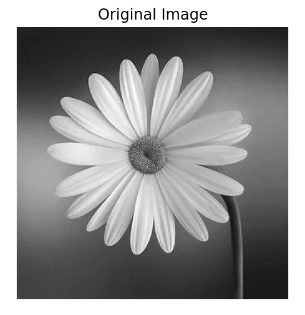

In [2]:
def image_show(X, title):
    img = plt.imshow(X)
    img.set_cmap('gray')
    plt.axis("off")
    plt.title(title)
    plt.show()
def rgb_gray(filename):
    A = imread(filename)
    return np.mean(A, -1)



1.   Convert the RBG image into a grayscale image using the `rgb_gray` function, store the array representing the grayscale into variable `img`, and then display the image using the `image_show` function.





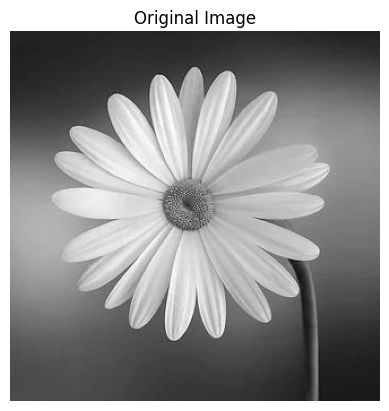

In [3]:
img = rgb_gray("flower.jpg")
image_show(img, "Original Image")

2.   Perform SVD into the gray scale image `img` using the `np.linalg.svd` command.



In [4]:
U, S, VT = np.linalg.svd(img)
Sigma = np.diag(S)#make array S into a diagnal matrix Sigma

In [5]:
#In this list we store the values of the ranks of the reconstructed images.
ranks = [rank(img), 100, 50, 25, 5, 1]

3. Here we will reconstruct a compressed image for each value $k$ in the list `ranks`. For reconstruction with rank $k$ we take the first $k$ columns of $U$, the top-left $k$ by $k$ matrix of $\Sigma$ and first $k$ columns of $V$ (or first $k$ rows of $V^T$), as shown in this image:

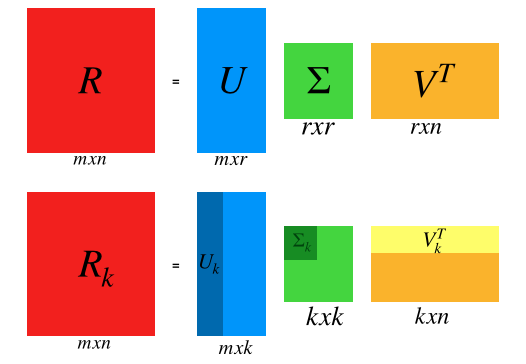

Plot every reconstruted image using the `image_show` function.


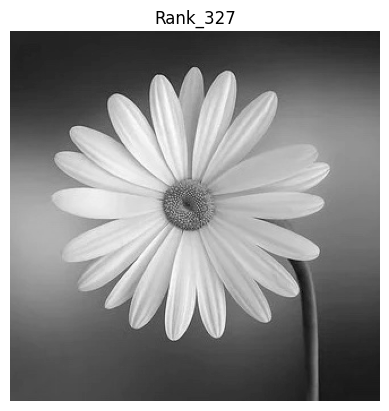

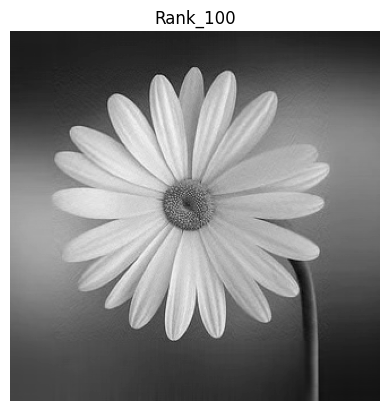

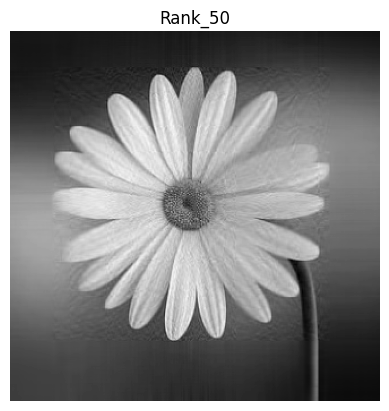

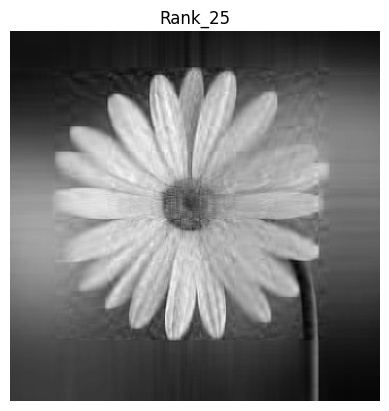

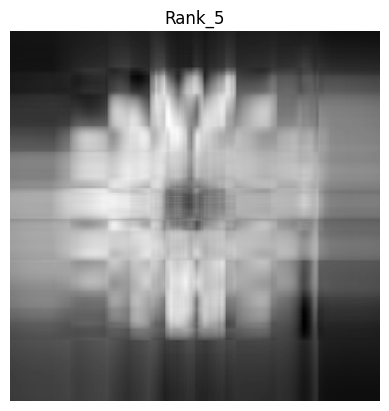

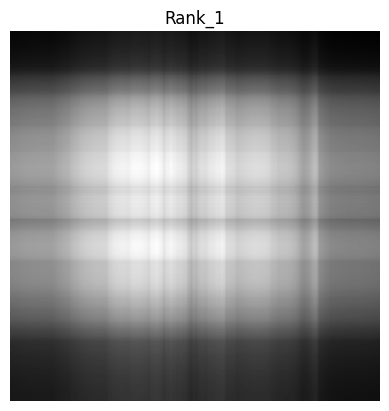

In [6]:
for k in ranks:
  reconstructed_image = U[:,:k]@Sigma[:k,:k]@VT[:k,:]
  image_show(reconstructed_image, title = f"Rank_{k}")